In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


class DataPreprocessing:
    def __init__(self, csv_file):
        try :
          self.df = pd.read_csv(csv_file)
        except FileNotFoundError :
          raise Exception(f"the is not found !")
        except pd.errors.EmptyDataError :
          raise Exception(f"The chosen file is empty !")

        nltk.download('punkt')
        self.stop_words = set(stopwords.words('english'))
        self.additional_stopwords = [
    # Common filler words
    "actually", "basically", "literally", "seriously", "just", "really", "like", "so", "very",

    # Common phrases and contractions
    "im","i'm", "you're", "we're", "they're", "he's",  "she's", "it's", "that's", "there's",
    "isn't", "aren't", "wasn't", "weren't", "won't", "wouldn't", "shouldn't", "can't",
    "couldn't", "doesn't", "don't", "didn't", "haven't", "hasn't", "hadn't", "mightn't",

    # Placeholder words
    "something", "thing", "stuff", "someone", "somebody", "anyone", "anybody", "everyone",
    "everything", "nothing", "nobody",

    # Conversational words
    "hey", "hi", "hello", "bye", "okay", "ok", "thanks", "thank", "please", "yes", "no",
    "yeah", "yep", "nope", "oh", "uh", "huh", "hmm", "lol", "omg", "haha", "anyway", "btw",

    # Temporal words
    "today", "tomorrow", "yesterday", "tonight", "morning", "afternoon", "evening", "midnight",
    "year", "month", "week", "day", "hour", "minute", "second", "time",

    # Emotional or expletive words
    "damn", "crap", "shit", "fuck", "fucking", "wtf", "hell", "stupid", "dumb", "idiot",

    # Forum-specific jargon
    "edit", "post", "thread", "comment", "reply", "message", "quote", "user", "profile",
    "admin", "mod", "moderator", "report", "ban", "banned",

    # Pronouns (if not already removed)
    "i", "me", "my", "mine", "myself", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
    "we", "us", "our", "ours", "ourselves", "they", "them", "their", "theirs", "themselves",

    # Modal verbs
    "can", "could", "shall", "should", "will", "would", "may", "might", "must", "ought",

    # Articles
    "a", "an", "the",

    # Other filler phrases
    "kind", "sort", "type", "lot", "etc", "e.g.", "i.e.", "regard", "regards", "dear",

    # Numerics (if not relevant)
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "first",
    "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth",

    # Social media words
    "rt", "retweet", "dm", "pm", "hashtag", "tag", "like", "follow", "follower", "unfollow",
    "share", "subscribe", "channel", "account", "username", "link", "url", "website",
    'im', 'ive', 'dont', 'get', 'go', 'know', 'want', 'thing', 'think', 'also', 'way', 'still', 'take', 'come', 'make', 'said', 'tell', 'ask', 'give', 'got', 'put', 'see', 'let', 'find',
    'look', 'keep', 'move', 'use', 'doesnt', 'seem', 'mayb', 'mean', 'probabl', 'your', 'idk',
    'he', 'she', 'they', 'it',
     'see', 'live', 'know', 'ask', 'tell', 'come', 'didnt', 'said', 'saw', 'thought', 'understand', 'read', 'hear'
]
        self.ps = PorterStemmer()
        self.wnl = WordNetLemmatizer()



    def clean_text(self,text):
        text = str(text)
        text = text.lower()
        text = re.sub(r'\br/', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.strip()
        return text

    def remove_stopwords(self, text):
        words = text.split()
        return ' '.join(word for word in words if word.lower() not in self.stop_words)

    def remove_additional_stopwords(self, text):
        words = text.split()
        return ' '.join(word for word in words if word.lower() not in self.additional_stopwords)

    def remove_special_characters(self, text):
        return re.sub(r'[^A-Za-z0-9\s]', '', text)

    def tokenize_stem_lemmatize(self, text):
        tokens = word_tokenize(text)
        stemmed = [self.ps.stem(word) for word in tokens]
        lemmatized = [self.wnl.lemmatize(word) for word in stemmed]
        return lemmatized

    def preprocess(self):
        try:
          self.df.info()
          self.df = self.df.drop(columns=["Title", "Upvotes", "Comments"], axis=1)
          self.df['cleaned_text'] = self.df['Text'].apply(str)
          self.df['cleaned_text'] = self.df['Text'].apply(self.clean_text)
          self.df['cleaned_text'] = self.df['cleaned_text'].apply(self.remove_stopwords)
          self.df['cleaned_text'] = self.df['cleaned_text'].apply(self.remove_additional_stopwords)
          self.df['cleaned_text'] = self.df['cleaned_text'].apply(self.remove_special_characters)
          self.df['tokens'] = self.df['cleaned_text'].apply(self.tokenize_stem_lemmatize)
        except KeyError as e :
          raise Exception(f"There is a missing column: {str(e)}")

    def get_processed_data(self):
        return self.df[['cleaned_text', 'tokens', 'category']]





preprocessing = DataPreprocessing("initial_data.csv")
preprocessing.preprocess()
processed_df = preprocessing.get_processed_data()
print(processed_df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     8550 non-null   object
 1   Upvotes   8550 non-null   int64 
 2   Text      8339 non-null   object
 3   Comments  8550 non-null   int64 
 4   category  8550 non-null   object
dtypes: int64(2), object(3)
memory usage: 334.1+ KB
                                           cleaned_text  \
0     friends always intended anxiety safe political...   
1     welcome anxiety monthly checkin serve casual c...   
2     extreme health anxiety progressed poorly past ...   
3     recent election results going constantly surro...   
4     always exercise good stress relief never works...   
...                                                 ...   
8545  brothers journal wrote plan drown bridge next ...   
8546  everyday life wake waiting years span june ill...   
8547  people never good experiences telling p

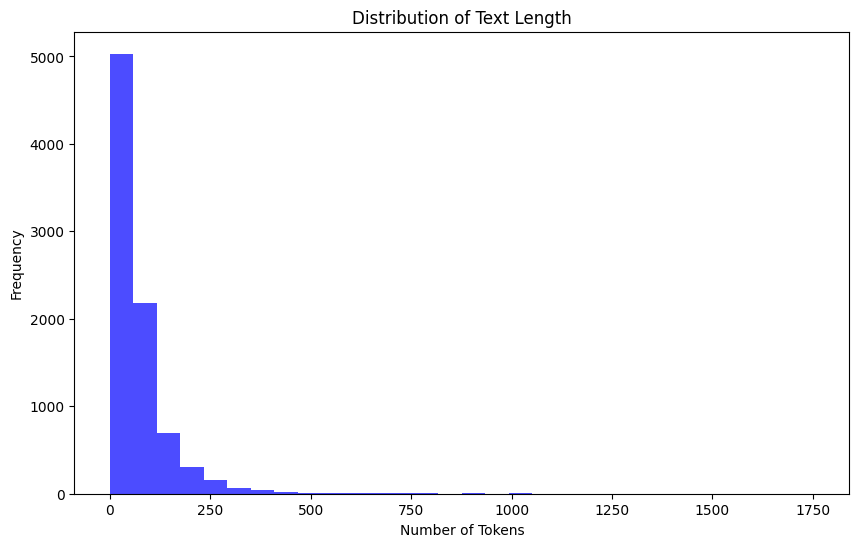

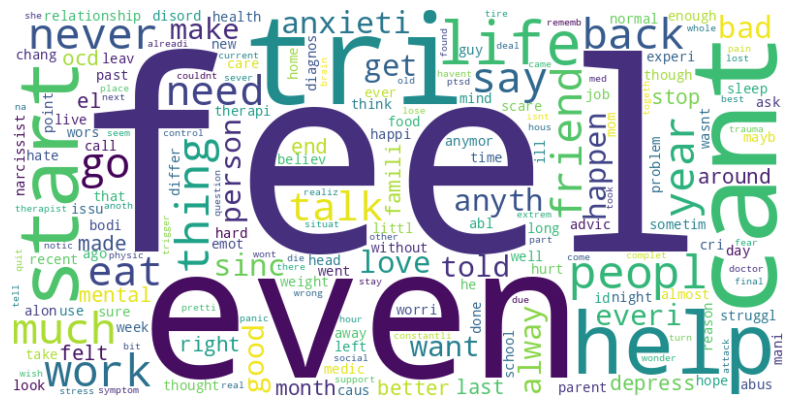

<ipython-input-25-e46ea1ac63c6>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x='category', order=self.df['category'].value_counts().index, palette='viridis')


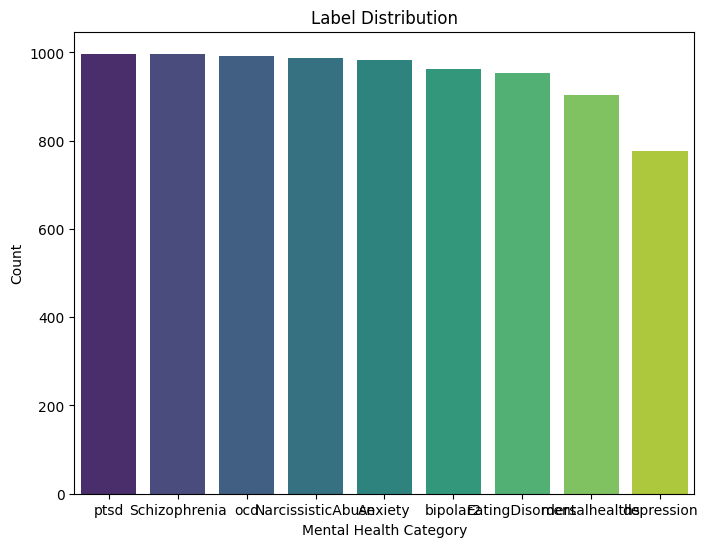

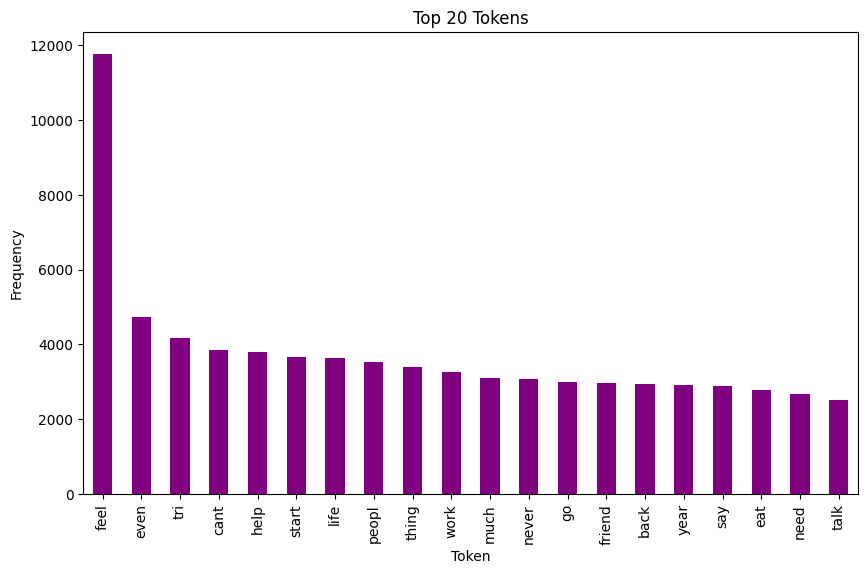

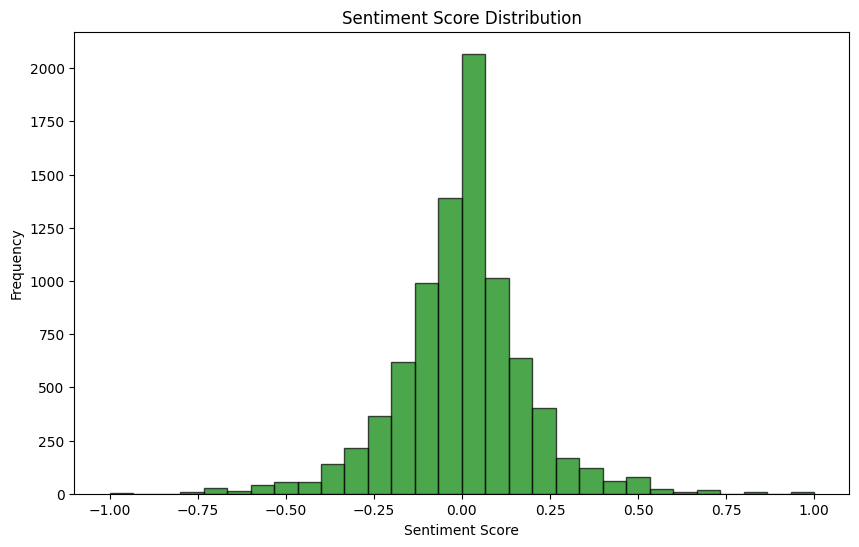

***************************************************************************************************
ANOVA TEST : Sentiment scores differ significantly across different mental health categories
 
Null Hypothesis (H0): There is no significant difference in sentiment scores across categories.
Alternative Hypothesis (H1): There is a significant difference in sentiment scores across categories.
 
 
The p-value is 7.873602038783463e-17
There is a significant difference in sentiment scores across categories (p < 0.05).
***************************************************************************************************
CHI-SQUARE TEST: The frequency of specific words is significantly associated with sentiment scores 
 
Null Hypothesis (H0): There is no significant association between the words in 'words_to_test' and the categories.
Alternative Hypothesis (H1): There is a significant association between the words in 'words_to_test' and the categories. The observed differences in the frequency of

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency


class DataAnalysis:
    def __init__(self, processed_df, words_to_test):
        self.df = processed_df
        self.words_to_test = words_to_test

    def plot_text_length_distribution(self):
        # Calculate text length
        self.df['text_length'] = self.df['tokens'].apply(len)

        # Plot distribution
        plt.figure(figsize=(10, 6))
        plt.hist(self.df['text_length'], bins=30, color='blue', alpha=0.7)
        plt.title('Distribution of Text Length')
        plt.xlabel('Number of Tokens')
        plt.ylabel('Frequency')
        plt.show()

    def plot_wordcloud(self):
        # Flatten tokens into a single list
        all_tokens = [word for tokens in self.df['tokens'] for word in tokens]

        # Count word frequencies
        word_freq = Counter(all_tokens)

        # WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    def plot_label_distribution(self):
        # Plot the distribution of labels
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.df, x='category', order=self.df['category'].value_counts().index, palette='viridis')
        plt.title('Label Distribution')
        plt.xlabel('Mental Health Category')
        plt.ylabel('Count')
        plt.show()

    def plot_top_tokens(self):
        # Frequency of tokens
        all_tokens = [word for tokens in self.df['tokens'] for word in tokens]
        token_freq = pd.Series(all_tokens).value_counts()

        # Plot top 20 tokens
        plt.figure(figsize=(10, 6))
        token_freq.head(20).plot(kind='bar', color='purple')
        plt.title('Top 20 Tokens')
        plt.xlabel('Token')
        plt.ylabel('Frequency')
        plt.show()

    def plot_sentiment_distribution(self):
        # Sentiment score for each text
        self.df['sentiment'] = self.df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

        # Plot sentiment distribution
        plt.figure(figsize=(10, 6))
        plt.hist(self.df['sentiment'], bins=30, color='green', edgecolor='black', alpha=0.7)
        plt.title('Sentiment Score Distribution')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.show()

    def sentiment_by_category_anova(self):
        grouped = [self.df[self.df['category'] == category]['sentiment'].dropna() for category in self.df['category'].unique()]

        f_statistic, p_value = stats.f_oneway(*grouped)
        print("***************************************************************************************************")
        print("\033[1mANOVA TEST : Sentiment scores differ significantly across different mental health categories\033[0m")
        print(" ")
        print("Null Hypothesis (H0): There is no significant difference in sentiment scores across categories.")
        print("Alternative Hypothesis (H1): There is a significant difference in sentiment scores across categories.")
        print(" ")
        print(" ")
        print(f"\033[1mThe p-value is {p_value}\033[0m")

        if p_value < 0.05:
            print("There is a significant difference in sentiment scores across categories (p < 0.05).")
        else:
            print("No significant difference in sentiment scores across categories (p >= 0.05).")

    def chi_square_test(self):
        # Step 1: Create a contingency table (word frequency by category)
        contingency_table = pd.crosstab(
            self.df['category'],
            self.df['tokens'].apply(lambda tokens: [word for word in tokens if word in self.words_to_test]).apply(lambda x: len(x))
        )

        # Step 2: Apply the Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        # Step 3: Display results
        print("***************************************************************************************************")
        print("\033[1mCHI-SQUARE TEST: The frequency of specific words is significantly associated with sentiment scores\033[0m ")
        print(" ")
        print("Null Hypothesis (H0): There is no significant association between the words in 'words_to_test' and the categories.")
        print("Alternative Hypothesis (H1): There is a significant association between the words in 'words_to_test' and the categories. The observed differences in the frequency of words across categories are not due to random chance.")
        print(" ")
        print(" ")
        print(f"Chi-Square Test result: Chi2 = {chi2}, p-value = {p_value}, degrees of freedom = {dof}")
        if p_value < 0.05:
            print("There is a significant association between the words in 'words_to_test' and the categories.")
        else:
            print("There is no significant association between the words in 'words_to_test' and the categories.")

# Example usage
# Define the words_to_test as a list of words (you would typically define a list of important words to test)
words_to_test = pd.Series([word for tokens in processed_df['tokens'] for word in tokens]).value_counts().head(1000).index.tolist()

# Assuming `processed_df` is your DataFrame containing 'tokens' and 'category' columns
analysis = DataAnalysis(processed_df, words_to_test)

# Run the analysis methods
analysis.plot_text_length_distribution()
analysis.plot_wordcloud()
analysis.plot_label_distribution()
analysis.plot_top_tokens()
analysis.plot_sentiment_distribution()
analysis.sentiment_by_category_anova()
analysis.chi_square_test()



Training Logistic Regression...
Evaluation of Logistic Regression:
Accuracy: 0.6982456140350877
Classification Report:
                    precision    recall  f1-score   support

          Anxiety       0.76      0.68      0.72       205
  EatingDisorders       0.87      0.90      0.89       186
NarcissisticAbuse       0.84      0.86      0.85       198
    Schizophrenia       0.59      0.71      0.64       194
         bipolar2       0.75      0.64      0.69       212
       depression       0.48      0.56      0.52       144
    mentalhealths       0.38      0.38      0.38       165
              ocd       0.81      0.76      0.78       213
             ptsd       0.76      0.73      0.74       193

         accuracy                           0.70      1710
        macro avg       0.69      0.69      0.69      1710
     weighted avg       0.71      0.70      0.70      1710



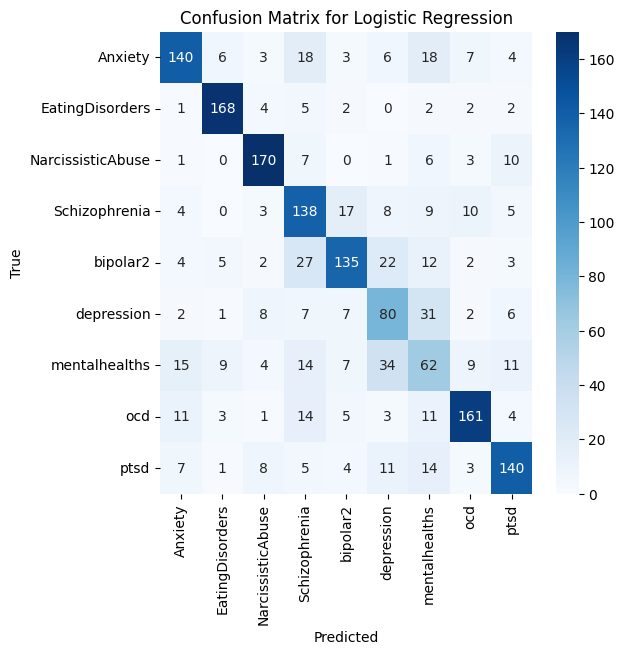


Training Naive Bayes...
Evaluation of Naive Bayes:
Accuracy: 0.6421052631578947
Classification Report:
                    precision    recall  f1-score   support

          Anxiety       0.65      0.66      0.65       205
  EatingDisorders       0.80      0.91      0.85       186
NarcissisticAbuse       0.66      0.91      0.76       198
    Schizophrenia       0.70      0.49      0.58       194
         bipolar2       0.73      0.57      0.64       212
       depression       0.54      0.42      0.47       144
    mentalhealths       0.28      0.30      0.29       165
              ocd       0.78      0.70      0.74       213
             ptsd       0.59      0.72      0.64       193

         accuracy                           0.64      1710
        macro avg       0.64      0.63      0.63      1710
     weighted avg       0.65      0.64      0.64      1710



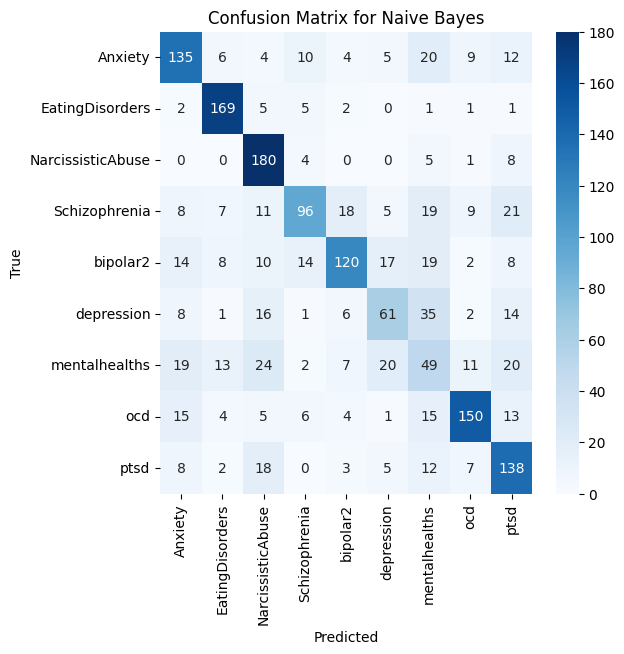


Training Random Forest...
Evaluation of Random Forest:
Accuracy: 0.6701754385964912
Classification Report:
                    precision    recall  f1-score   support

          Anxiety       0.71      0.68      0.69       205
  EatingDisorders       0.77      0.93      0.84       186
NarcissisticAbuse       0.77      0.85      0.81       198
    Schizophrenia       0.54      0.69      0.61       194
         bipolar2       0.74      0.62      0.67       212
       depression       0.48      0.53      0.50       144
    mentalhealths       0.34      0.21      0.26       165
              ocd       0.79      0.77      0.78       213
             ptsd       0.71      0.64      0.68       193

         accuracy                           0.67      1710
        macro avg       0.65      0.66      0.65      1710
     weighted avg       0.66      0.67      0.66      1710



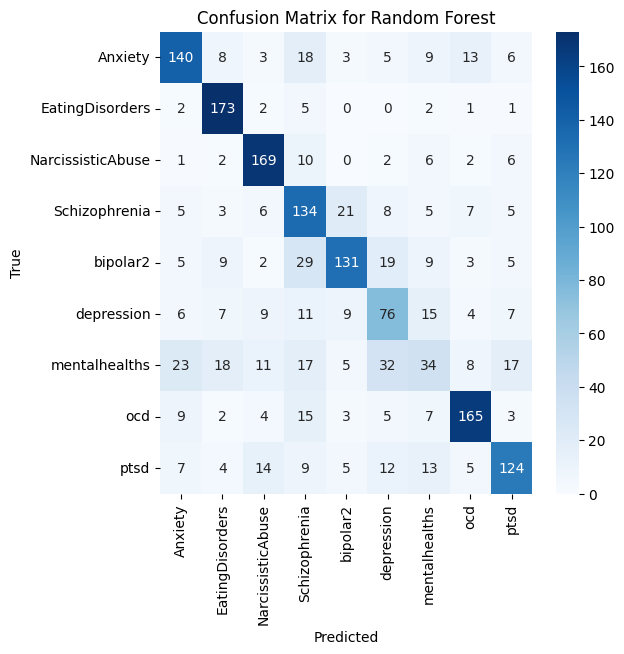


Training SVM...
Evaluation of SVM:
Accuracy: 0.6777777777777778
Classification Report:
                    precision    recall  f1-score   support

          Anxiety       0.75      0.67      0.71       205
  EatingDisorders       0.87      0.88      0.87       186
NarcissisticAbuse       0.88      0.83      0.85       198
    Schizophrenia       0.55      0.72      0.62       194
         bipolar2       0.77      0.59      0.67       212
       depression       0.49      0.53      0.51       144
    mentalhealths       0.31      0.42      0.36       165
              ocd       0.83      0.72      0.77       213
             ptsd       0.78      0.66      0.72       193

         accuracy                           0.68      1710
        macro avg       0.69      0.67      0.68      1710
     weighted avg       0.70      0.68      0.69      1710



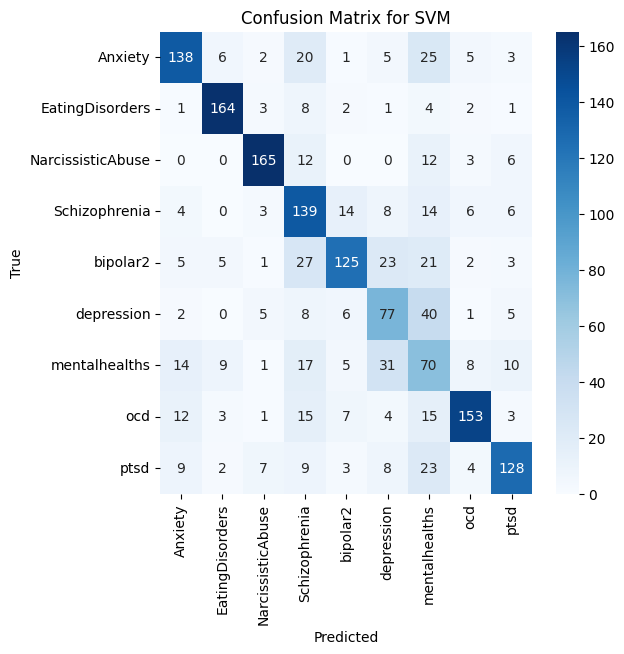

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

class Train_and_Evaluate:
    def __init__(self, df):

        self.df = df.copy()
        self.label_encoder = LabelEncoder()
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
        self.models = {
            "Logistic Regression": LogisticRegression(),
            "Naive Bayes": MultinomialNB(),
            "Random Forest": RandomForestClassifier(),
            "SVM": SVC()
        }

    def preprocess(self):

        # Encode labels
        self.df['encoded_category'] = self.label_encoder.fit_transform(self.df['category'])

        # Ensure tokens are strings
        self.df['tokens'] = self.df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

        # Split the data into training and testing sets
        X = self.df['tokens']
        y = self.df['encoded_category']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Vectorize text data (TF-IDF)
        self.X_train_tfidf = self.vectorizer.fit_transform(self.X_train)
        self.X_test_tfidf = self.vectorizer.transform(self.X_test)

    def decode_labels(self, encoded_labels):

        return self.label_encoder.inverse_transform(encoded_labels)

    def train_and_evaluate(self):

        results = {}

        for model_name, model in self.models.items():
            print(f"\nTraining {model_name}...")

            # Train the model
            model.fit(self.X_train_tfidf, self.y_train)

            # Predict on the test data
            y_pred = model.predict(self.X_test_tfidf)

            # Decode predictions and true labels
            y_pred_decoded = self.decode_labels(y_pred)
            y_test_decoded = self.decode_labels(self.y_test)

            # Evaluate performance
            accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
            class_report = classification_report(y_test_decoded, y_pred_decoded)
            conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

            results[model_name] = {
                "accuracy": accuracy,
                "classification_report": class_report,
                "confusion_matrix": conf_matrix
            }

            print(f"Evaluation of {model_name}:")
            print("Accuracy:", accuracy)
            print("Classification Report:\n", class_report)

            # Visualize Confusion Matrix
            plt.figure(figsize=(6, 6))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                        xticklabels=self.label_encoder.classes_,
                        yticklabels=self.label_encoder.classes_)
            plt.title(f"Confusion Matrix for {model_name}")
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()

        return results

trainer = Train_and_Evaluate(processed_df)
trainer.preprocess()
results = trainer.train_and_evaluate()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


.


Training Logistic Regression...
Model saved as /content/drive/MyDrive/Colab Notebooks/Mental_Health_Project/logistic_regression_model.pkl
Evaluation of Logistic Regression:
Accuracy:                    precision    recall  f1-score   support

          Anxiety       0.76      0.68      0.72       205
  EatingDisorders       0.87      0.90      0.89       186
NarcissisticAbuse       0.84      0.86      0.85       198
    Schizophrenia       0.59      0.71      0.64       194
         bipolar2       0.75      0.64      0.69       212
       depression       0.48      0.56      0.52       144
    mentalhealths       0.38      0.38      0.38       165
              ocd       0.81      0.76      0.78       213
             ptsd       0.76      0.73      0.74       193

         accuracy                           0.70      1710
        macro avg       0.69      0.69      0.69      1710
     weighted avg       0.71      0.70      0.70      1710

Classification Report:
                    pre

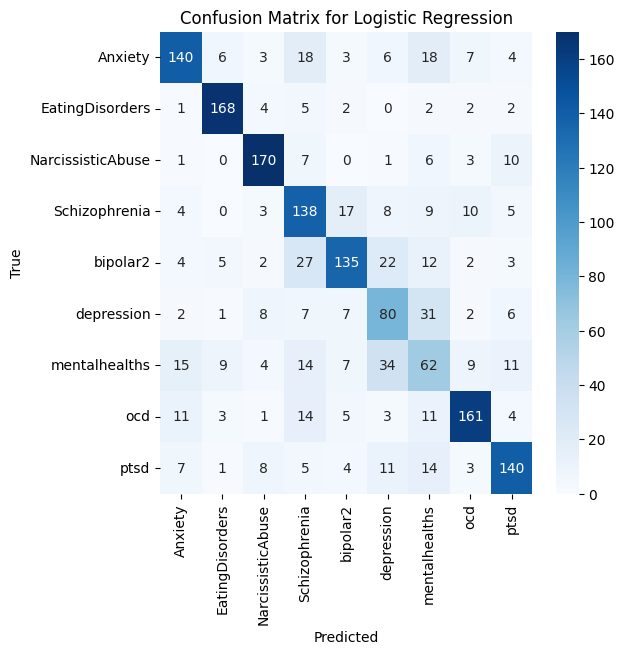

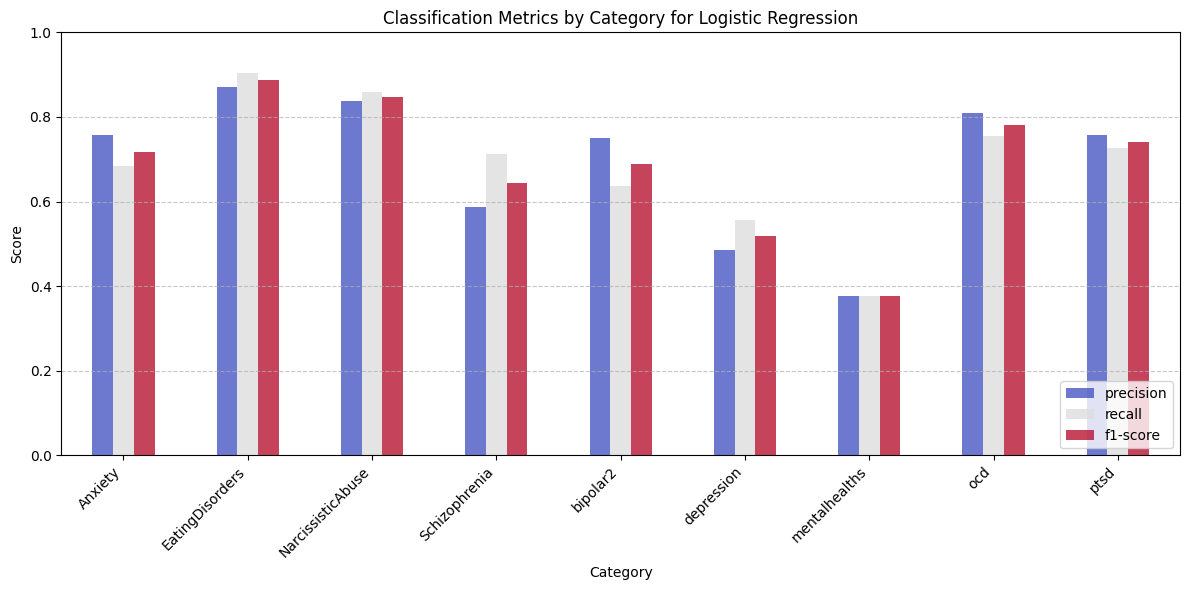

.
----------------------------------------------------------------------
Ran 2 tests in 5.039s

OK


In [ ]:
import unittest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
from google.colab import drive  # Import the drive module for Google Colab

# Mount Google Drive
drive.mount('/content/drive')

# Define the Train_and_Evaluate_LogisticRegression class
class Train_and_Evaluate_LogisticRegression:
    def __init__(self, df):
        self.df = df.copy()
        self.label_encoder = LabelEncoder()
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
        self.model = LogisticRegression()

    def preprocess(self):
        # Encode labels
        self.df['encoded_category'] = self.label_encoder.fit_transform(self.df['category'])

        # Ensure tokens are strings
        self.df['tokens'] = self.df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

        # Split the data into training and testing sets
        X = self.df['tokens']
        y = self.df['encoded_category']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Vectorize text data (TF-IDF)
        self.X_train_tfidf = self.vectorizer.fit_transform(self.X_train)
        self.X_test_tfidf = self.vectorizer.transform(self.X_test)

    def decode_labels(self, encoded_labels):
        # Decode encoded labels back to original category names
        return self.label_encoder.inverse_transform(encoded_labels)

    def save_model(self, filename):
        # Save the trained model as a pickle file in the desired directory in Google Drive
        model_path = f'/content/drive/MyDrive/Colab Notebooks/Mental_Health_Project/{filename}'
        with open(model_path, 'wb') as file:
            pickle.dump(self.model, file)
        print(f"Model saved as {model_path}")

    def train_and_evaluate(self):
        print("\nTraining Logistic Regression...")

        # Train the Logistic Regression model
        self.model.fit(self.X_train_tfidf, self.y_train)

        # Save the trained model
        self.save_model('logistic_regression_model.pkl')

        # Predict on the test data
        y_pred = self.model.predict(self.X_test_tfidf)

        # Decode predictions and true labels
        y_pred_decoded = self.decode_labels(y_pred)
        y_test_decoded = self.decode_labels(self.y_test)

        # Evaluate performance
        accuracy = classification_report(y_test_decoded, y_pred_decoded)
        class_report = classification_report(y_test_decoded, y_pred_decoded)
        conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

        print("Evaluation of Logistic Regression:")
        print("Accuracy:", accuracy)
        print("Classification Report:\n", class_report)

        # Visualize Confusion Matrix
        plt.figure(figsize=(6, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels=self.label_encoder.classes_,
                    yticklabels=self.label_encoder.classes_)
        plt.title(f"Confusion Matrix for Logistic Regression")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Plot classification metrics
        self.plot_classification_report(y_test_decoded, y_pred_decoded)

    def plot_classification_report(self, y_test_decoded, y_pred_decoded):
        # Generate classification report
        report = classification_report(y_test_decoded, y_pred_decoded, target_names=self.label_encoder.classes_, output_dict=True)

        # Convert the report to a DataFrame
        report_df = pd.DataFrame(report).transpose()

        # Drop overall metrics and focus on categories
        category_metrics = report_df.iloc[:-3, :]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

        # Plot precision, recall, and F1-score
        category_metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6), cmap='coolwarm', alpha=0.75)
        plt.title("Classification Metrics by Category for Logistic Regression")
        plt.xlabel("Category")
        plt.ylabel("Score")
        plt.xticks(rotation=45, ha="right")
        plt.ylim(0, 1)
        plt.legend(loc="lower right")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Unit test class for validating the functionality of the model training and evaluation
class TestTrainAndEvaluateLogisticRegression(unittest.TestCase):

    def setUp(self):
        self.df = processed_df
        self.trainer = Train_and_Evaluate_LogisticRegression(self.df)

    def test_preprocess(self):
        # Test preprocessing step
        self.trainer.preprocess()
        self.assertIn('encoded_category', self.trainer.df.columns)
        self.assertEqual(self.trainer.X_train.shape[0], int(0.8 * len(self.df)))
        self.assertEqual(self.trainer.X_test.shape[0], int(0.2 * len(self.df)))

    def test_train_and_evaluate(self):

        self.trainer.preprocess()
        self.trainer.train_and_evaluate()
        self.assertIsNotNone(self.trainer.model)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


In [ ]:
class MentalHealthPredictor:
    def __init__(self, model, vectorizer, label_encoder, suggestions):

        self.model = model
        self.vectorizer = vectorizer
        self.label_encoder = label_encoder
        self.suggestions = suggestions

    def decode_labels(self, encoded_labels):

        return self.label_encoder.inverse_transform(encoded_labels)

    def get_top_3_predictions(self, text):

        # Transform input text into TF-IDF features
        text_tfidf = self.vectorizer.transform([text])

        # Predict probabilities for each class
        probs = self.model.predict_proba(text_tfidf)[0]

        # Get indices of top 3 highest probabilities
        top_3_indices = probs.argsort()[-3:][::-1]

        # Map indices back to category names
        top_3_categories = self.label_encoder.inverse_transform(top_3_indices)

        # Get probabilities and suggestions for the top 3 categories
        top_3_probs = probs[top_3_indices]
        top_3_suggestions = [self.suggestions.get(cat, ["No suggestions available."]) for cat in top_3_categories]

        return top_3_categories, top_3_probs, top_3_suggestions




# Extract the trained objects after evaluation is complete
model = trainer.model
vectorizer = trainer.vectorizer
label_encoder = trainer.label_encoder

# Define suggestions as per the categories
suggestions = {
    "Anxiety": [
        "Practice mindfulness and deep breathing exercises.",
        "Consider talking to a counselor or therapist.",
        "Try to limit caffeine and alcohol consumption.",
    ],
    "EatingDisorders": [
        "Consult a nutritionist to develop a healthy eating plan.",
        "Consider therapy to address underlying psychological factors.",
        "Engage in activities that focus on body positivity and self-esteem.",
    ],
    "NarcissisticAbuse": [
        "Consider talking to a therapist to process the trauma.",
        "Set healthy boundaries with toxic individuals.",
        "Seek support from loved ones or support groups.",
    ],
    "Schizophrenia": [
        "Work with a psychiatrist for medication management.",
        "Join a support group for people with schizophrenia.",
        "Develop a routine that includes healthy habits like exercise and sleep.",
    ],
    "bipolar2": [
        "Consider mood stabilizers prescribed by a healthcare provider.",
        "Practice good sleep hygiene and avoid alcohol or drugs.",
        "Engage in regular therapy sessions, such as CBT.",
    ],
    "depression": [
        "Engage in regular physical activity, like a walk or workout.",
        "Try to maintain a healthy, balanced diet.",
        "Connect with friends or family for support.",
    ],
    "mentalhealths": [
        "Take small breaks during stressful moments.",
        "Reach out to a mental health professional for guidance.",
        "Engage in self-care activities, like reading or taking walks.",
    ],
    "ocd": [
        "Consider CBT (Cognitive Behavioral Therapy) for OCD.",
        "Practice mindfulness to manage intrusive thoughts.",
        "Try to maintain a structured routine.",
    ],
    "ptsd": [
        "Consider seeking professional trauma therapy.",
        "Practice grounding techniques to stay present.",
        "Try to engage in regular physical activity to reduce stress.",
    ],
}

# Initialize the predictor with the pre-trained model
predictor = MentalHealthPredictor(model, vectorizer, label_encoder, suggestions)

# User input for prediction
user_input = input("What is the problem?")

# Get top 3 predictions and suggestions
top_3_categories, top_3_probs, top_3_suggestions = predictor.get_top_3_predictions(user_input)

# Display the results
print("\nTop 3 Predictions with Probabilities:")
for i in range(3):
    print(f"{i+1}. {top_3_categories[i]} - Probability: {top_3_probs[i]*100:.2f}%")
    print(f"   Suggestions: {top_3_suggestions[i]}\n")


What is the problem?my ex bestfriend used me for his success , he just used me to succeed and then he stoped talking to me me he started to keep a distance

Top 3 Predictions with Probabilities:
1. NarcissisticAbuse - Probability: 21.97%
   Suggestions: ['Consider talking to a therapist to process the trauma.', 'Set healthy boundaries with toxic individuals.', 'Seek support from loved ones or support groups.']

2. Schizophrenia - Probability: 16.50%
   Suggestions: ['Work with a psychiatrist for medication management.', 'Join a support group for people with schizophrenia.', 'Develop a routine that includes healthy habits like exercise and sleep.']

3. ptsd - Probability: 10.98%
   Suggestions: ['Consider seeking professional trauma therapy.', 'Practice grounding techniques to stay present.', 'Try to engage in regular physical activity to reduce stress.']



In [ ]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

In [ ]:
import pickle
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
from google.colab import drive  # Import the drive module for Google Colab

# Mount Google Drive
drive.mount('/content/drive')

# Define the suggestions for each category
suggestions = {
    "Anxiety": [
        "Practice mindfulness and deep breathing exercises.",
        "Consider talking to a counselor or therapist.",
        "Try to limit caffeine and alcohol consumption.",
    ],
    "EatingDisorders": [
        "Consult a nutritionist to develop a healthy eating plan.",
        "Consider therapy to address underlying psychological factors.",
        "Engage in activities that focus on body positivity and self-esteem.",
    ],
    "NarcissisticAbuse": [
        "Consider talking to a therapist to process the trauma.",
        "Set healthy boundaries with toxic individuals.",
        "Seek support from loved ones or support groups.",
    ],
    "Schizophrenia": [
        "Work with a psychiatrist for medication management.",
        "Join a support group for people with schizophrenia.",
        "Develop a routine that includes healthy habits like exercise and sleep.",
    ],
    "bipolar2": [
        "Consider mood stabilizers prescribed by a healthcare provider.",
        "Practice good sleep hygiene and avoid alcohol or drugs.",
        "Engage in regular therapy sessions, such as CBT.",
    ],
    "depression": [
        "Engage in regular physical activity, like a walk or workout.",
        "Try to maintain a healthy, balanced diet.",
        "Connect with friends or family for support.",
    ],
    "mentalhealths": [
        "Take small breaks during stressful moments.",
        "Reach out to a mental health professional for guidance.",
        "Engage in self-care activities, like reading or taking walks.",
    ],
    "ocd": [
        "Consider CBT (Cognitive Behavioral Therapy) for OCD.",
        "Practice mindfulness to manage intrusive thoughts.",
        "Try to maintain a structured routine.",
    ],
    "ptsd": [
        "Consider seeking professional trauma therapy.",
        "Practice grounding techniques to stay present.",
        "Try to engage in regular physical activity to reduce stress.",
    ],
}

# Save the suggestions dictionary as a pickle file
with open("/content/drive/MyDrive/Colab Notebooks/Mental_Health_Project/models/suggestions.pkl", "wb") as f:
    pickle.dump(suggestions, f)

# Save the GPT-2 model and tokenizer as pickles
gpt2_model = TFGPT2LMHeadModel.from_pretrained("distilgpt2")
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")

with open("/content/drive/MyDrive/Colab Notebooks/Mental_Health_Project/models/gpt_model.pkl", "wb") as f:
    pickle.dump(gpt2_model, f)

with open("/content/drive/MyDrive/Colab Notebooks/Mental_Health_Project/models/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


class MentalHealthPredictor:
    def __init__(self, model, vectorizer, label_encoder, suggestions, gpt2_model, tokenizer):
        self.model = model
        self.vectorizer = vectorizer
        self.label_encoder = label_encoder
        self.suggestions = suggestions
        self.gpt2_model = gpt2_model
        self.tokenizer = tokenizer

        # Ensure tokenizer pad token is set
        self.tokenizer.pad_token = self.tokenizer.eos_token


    def decode_labels(self, encoded_labels):
        return self.label_encoder.inverse_transform(encoded_labels)

    def get_top_3_predictions(self, text):
        # Transform input text into TF-IDF features
        text_tfidf = self.vectorizer.transform([text])

        # Predict probabilities for each class
        probs = self.model.predict_proba(text_tfidf)[0]

        # Get indices of top 3 highest probabilities
        top_3_indices = probs.argsort()[-3:][::-1]

        # Map indices back to category names
        top_3_categories = self.label_encoder.inverse_transform(top_3_indices)

        # Get probabilities and suggestions for the top 3 categories
        top_3_probs = probs[top_3_indices]
        top_3_suggestions = [self.suggestions.get(cat, ["No suggestions available."]) for cat in top_3_categories]

        return top_3_categories, top_3_probs, top_3_suggestions

    def generate_gpt2_content(self, predictions):
        generated_contents = []
        for category in predictions:
            input_text = (
            f"The user is struggling with {category}, which is affecting their mental and emotional well-being. "
            f"Offer a 3 steps detailed, practical, and actionable advice for someone dealing with {category}. "
            f"Include specific techniques, coping strategies, and emotional support that could help them manage this condition. "
            f"Consider strategies like therapy, mindfulness, medication, self-care routines, or community support. "
            f"Be empathetic and provide real-life examples or steps the user can take to feel better."
        )

            inputs = self.tokenizer.encode_plus(
                input_text,
                return_tensors='pt',
                padding=True,
                truncation=True,
                max_length=300
            )

            input_ids = inputs['input_ids']
            attention_mask = inputs['attention_mask']

            output = self.gpt2_model.generate(
                input_ids,
                attention_mask=attention_mask,
                max_length=300,
                num_beams=2,
                no_repeat_ngram_size=3,
                early_stopping=True,
                temperature=0.8,
                top_k=50,
                do_sample=True,
                pad_token_id=self.tokenizer.eos_token_id
            )

            generated_text = self.tokenizer.decode(output[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
            generated_contents.append(f"{category}: {generated_text}")

        return generated_contents

    def predict_and_generate(self, text):
        start_time = time.time()

        # Get top 3 predictions and suggestions
        top_3_categories, top_3_probs, top_3_suggestions = self.get_top_3_predictions(text)

        # Generate GPT-2 content
        gpt2_generated_content = self.generate_gpt2_content(top_3_categories)

        # Display results
        end_time = time.time()
        elapsed_time = end_time - start_time

        print(f"\nTime taken to generate content: {elapsed_time:.2f} seconds")
        print("\nTop 3 Predictions with Probabilities: ")
        for i in range(3):
            print(f"{i+1}. {top_3_categories[i]} - Probability: {top_3_probs[i]*100:.2f}%")
            print(f"   Suggestions: {top_3_suggestions[i]}")
            print(f"   GPT-2 Generated Content: {gpt2_generated_content[i]}\n")


# Initialize the model, vectorizer, label encoder, and GPT-2 model
# These objects should be pre-trained, here we initialize them with dummy objects for demonstration
vectorizer = TfidfVectorizer()
label_encoder = LabelEncoder()

# Dummy training data for initializing the model (replace with actual data)
example_texts = processed_df['cleaned_text']
example_labels = processed_df['category']

# Fit the vectorizer and label encoder
vectorizer.fit(example_texts)
label_encoder.fit(example_labels)

with open("/content/drive/MyDrive/Colab Notebooks/Mental_Health_Project/models/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("/content/drive/MyDrive/Colab Notebooks/Mental_Health_Project/models/label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Train the model (dummy model here, replace with actual trained model)
model = LogisticRegression()
X = vectorizer.transform(example_texts)
y = label_encoder.transform(example_labels)
model.fit(X, y)

# Initialize the predictor with the pre-trained model
predictor = MentalHealthPredictor(model, vectorizer, label_encoder, suggestions, gpt2_model, tokenizer)

# User input for prediction
user_input = input("Please describe your problem: ")

# Get top 3 predictions and suggestions
predictor.predict_and_generate(user_input)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Please describe your problem: my ex bestfriend used me for his success , he just used me to succeed and then he stoped talking to me me he started to keep a distance

Time taken to generate content: 235.04 seconds

Top 3 Predictions with Probabilities: 
1. NarcissisticAbuse - Probability: 23.91%
   Suggestions: ['Consider talking to a therapist to process the trauma.', 'Set healthy boundaries with toxic individuals.', 'Seek support from loved ones or support groups.']
   GPT-2 Generated Content: NarcissisticAbuse: The user is struggling with NarcissisticAbuse, which is affecting their mental and emotional well-being. Offer a 3 steps detailed, practical, and actionable advice for someone dealing with NarcissisticAbuse. Include specific techniques, coping strategies, and emotional support that could help them manage this condition. Consider strategies like therapy, mindfulness, medication, self-care routines, or community support. Be empathetic and provide real-life examples or steps the